# $\bar \kappa$ Threshold

$\bar \kappa$ is the threshold minimum renegotiation cost required to sustain the first best efficient smoothing contract.  Any $\kappa < \bar \kappa$ will require some endogenous distortion of the contract to keep the contract renegotiation-proof.

The no-renegotiation constraint is: 

$$
u(c_{1}^{0})+\beta u(c_{2}^{0})\le u\left(\frac{c_{1}^{0}+c_{2}^{0}-\kappa}{1+\beta^{\frac{1}{\rho}}}\right)(1+\beta^{\frac{1}{\rho}})\label{eq:no-renegotiation}
$$

The first-best efficient contract $C_0^F=(c_0^F, c_1^F, c_2^F)$ in the competitive case is given by: 

$$
C_{0}^{F}=\left(\frac{y}{1+2\beta^{\frac{1}{\rho}}}\right)\cdot\left(1,\beta^{\frac{1}{\rho}},\beta^{\frac{1}{\rho}}\right)\label{eq:c-f}
$$

Setting $c_{1}^{0} =c_1^F = c_{2}^{0}$ equal to the implied efficient continuation contract into no-renegotiation constraint we can solve for the $\bar \kappa$ value of $\kappa$ that allows this to just hold:

$$
\bar \kappa = c_1^F \cdot  \Upsilon
$$

where 

$$
\Upsilon=\left[2-\left[\frac{(1+\beta)}{\left(1+\beta^{\frac{1}{\rho}}\right)^{\rho}}\right]^{\frac{1}{1-\rho}}\right]
$$

For the monopoly case we simply replace the competitive $c_1^F$ term by the analogous $c_1^{mF}$ efficient monopoly contract ters. The monopoly formula for the threshold is thus $\bar \kappa^m = c_1^{mF} \cdot  \Upsilon$

## Code
Several functions used can be found in the python module [Contract.py](Contract.py)

In [1]:
import Contract

Code below uses this module to produce Figure 1.  If code is hidden in HTML view, click button to display.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,fixed
plt.rcParams['figure.figsize'] = 10, 8
np.set_printoptions(precision=2) 

## Competitive $\bar \kappa$ and Monopoly $\bar \kappa^M$

We will in general have  $\bar \kappa^M \le \bar \kappa$ 

In [3]:
Cc = Contract.Competitive(beta=0.6)
Cm = Contract.Monopoly(beta=0.6)

In [4]:
Cc.kbar(), Cm.kbar()

(4.43642366042653, 4.3219284107549765)

In [13]:
def plotkb(rho=0.9, y0 = 100):
    num = 40
    kb = np.zeros(shape=(num, 3))
    Cc.y = np.array([y0, (300-y0)/2, (300-y0)/2])
    Cm.y = np.array([y0, (300-y0)/2, (300-y0)/2])
    Cc.rho = rho
    Cm.rho = rho
    for i in range(num):
        Cc.beta = i/num
        Cm.beta = i/num
        kb[i] = np.array([i/num, Cc.kbar(), Cm.kbar()])
    
    plt.plot(kb[:,0], kb[:,1], label = 'competitive')
    plt.plot(kb[:,0], kb[:,2], label = 'monopoly')
    plt.legend()
    plt.xlabel(r'$\beta$', fontsize=14)
    plt.ylabel(r'$\bar \kappa, \bar \kappa^m$', fontsize=14)
    plt.xlim(0,1)
    plt.ylim(0,20)
    

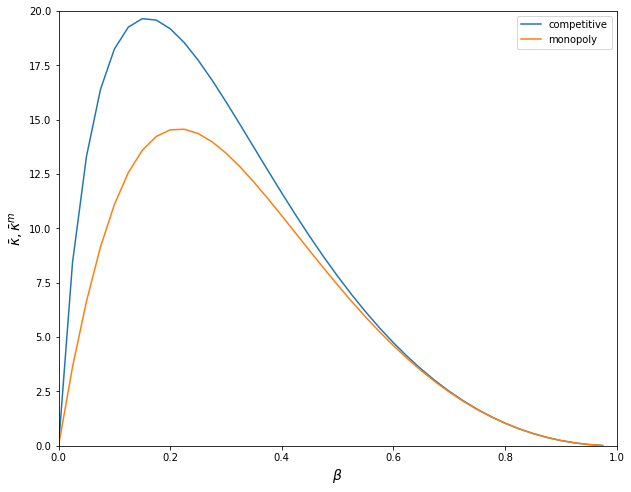

In [14]:
plotkb(rho = 1.1, y0 = 100)

In [11]:
interact(plotkb, rho=(0.1, 2, 0.101), y0=(50,200,10));

interactive(children=(FloatSlider(value=0.9, description='rho', max=2.0, min=0.1, step=0.101), IntSlider(value…